In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'theano'

In [4]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed


In [5]:
df.shape

(215, 15)

In [6]:
df.set_index(['sl_no'], inplace = True) 

In [7]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,Not Placed
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed


In [8]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            67
status             0
dtype: int64

In [9]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [10]:
temp = pd.DataFrame(index = df.columns)
temp['Data Type'] = df.dtypes
temp['null Values'] = df.isnull().sum()
temp['uniqueValues'] = df.nunique()
temp

,Data Type,null Values,uniqueValues
gender,object,0,2
ssc_p,float64,0,103
ssc_b,object,0,2
hsc_p,float64,0,97
hsc_b,object,0,2
hsc_s,object,0,3
degree_p,float64,0,89
degree_t,object,0,3
workex,object,0,2
etest_p,float64,0,100


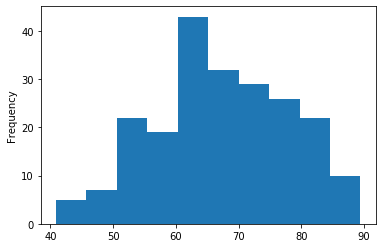

In [11]:
df['ssc_p'].plot.hist(bins = 10)

In [12]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [13]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [14]:
from scipy.stats import ttest_ind
sci = df[df['degree_t']== 'Sci&Tech']
comm = df[df['degree_t'] == 'Comm&Mgmt']
others = df[df['degree_t'] == 'Others']

In [15]:
ttest_ind(sci['salary'],comm['salary'],nan_policy = 'omit')

Ttest_indResult(statistic=2.0786256077393404, pvalue=0.03946403084269473)

In [16]:
ttest_ind(sci['salary'],others['salary'],nan_policy = 'omit')

Ttest_indResult(statistic=0.7476534084682854, pvalue=0.458646608388682)

In [17]:
ttest_ind(sci['salary'],others['salary'],nan_policy = 'omit')

Ttest_indResult(statistic=0.7476534084682854, pvalue=0.458646608388682)

In [18]:
df['salary'].head()

sl_no
1    270000.0
2    200000.0
3    250000.0
4         NaN
5    425000.0
Name: salary, dtype: float64

In [19]:
df['salary']=df['salary'].fillna(value = df['salary'].mean())

In [20]:

df = pd.get_dummies(df,columns= ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation',])

In [21]:
df.head()
#df.shape

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,status,gender_F,gender_M,ssc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
sl_no,,,,,,,,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.000000,Placed,0,1,0,...,0,1,0,0,0,1,1,0,0,1
2,79.33,78.33,77.48,86.5,66.28,200000.000000,Placed,0,1,1,...,0,0,1,0,0,1,0,1,1,0
3,65.00,68.00,64.00,75.0,57.80,250000.000000,Placed,0,1,1,...,1,0,0,1,0,0,1,0,1,0
4,56.00,52.00,52.00,66.0,59.43,288655.405405,Not Placed,0,1,1,...,0,0,1,0,0,1,1,0,0,1
5,85.80,73.60,73.30,96.8,55.50,425000.000000,Placed,0,1,1,...,0,1,0,1,0,0,1,0,1,0


In [63]:
from sklearn.preprocessing import LabelEncoder  
label_encoder_df= LabelEncoder()  
df['status']= label_encoder_df.fit_transform(df['status'])  
df.head(10)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,status,gender_F,gender_M,ssc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
sl_no,,,,,,,,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.00,58.80,270000.000000,1,0,1,0,...,0,1,0,0,0,1,1,0,0,1
2,79.33,78.33,77.48,86.50,66.28,200000.000000,1,0,1,1,...,0,0,1,0,0,1,0,1,1,0
3,65.00,68.00,64.00,75.00,57.80,250000.000000,1,0,1,1,...,1,0,0,1,0,0,1,0,1,0
4,56.00,52.00,52.00,66.00,59.43,288655.405405,0,0,1,1,...,0,0,1,0,0,1,1,0,0,1
5,85.80,73.60,73.30,96.80,55.50,425000.000000,1,0,1,1,...,0,1,0,1,0,0,1,0,1,0
6,55.00,49.80,67.25,55.00,51.58,288655.405405,0,0,1,0,...,0,0,1,0,0,1,0,1,1,0
7,46.00,49.20,79.00,74.28,53.29,288655.405405,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
8,82.00,64.00,66.00,67.00,62.14,252000.000000,1,0,1,1,...,0,0,1,0,0,1,0,1,1,0
9,73.00,79.00,72.00,91.34,61.29,231000.000000,1,0,1,1,...,0,1,0,1,0,0,1,0,1,0


In [23]:
x= df.drop(['status'],axis = 1)
y = df['status']
y.shape,x.shape

((215,), (215, 22))

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [26]:
x.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0.538240,0.889621,0.195122,0.104167,0.284483,0.094595,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.792414,0.680890,0.670244,0.760417,0.564843,0.000000,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.497011,0.510708,0.341463,0.520833,0.247001,0.067568,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.311482,0.247117,0.048780,0.333333,0.308096,0.119805,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.925788,0.602965,0.568293,0.975000,0.160795,0.304054,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [27]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify=y)

In [28]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [29]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.8395061728395061


In [30]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [31]:
k = range(1,100)

In [32]:
test = Elbow(k)
min(test)

0.15294117647058814

Text(0.5, 1.0, 'Elbow Curve for test')

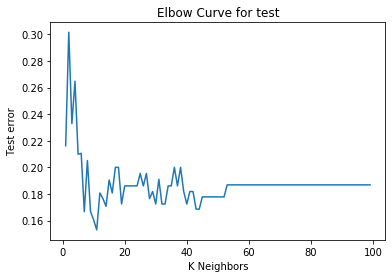

In [33]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [34]:
# Creating instance of KNN
clf = KNN(n_neighbors = 12)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.8192771084337348


In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 13), X = train_x, y = train_y, cv = 10)
score

array([0.82352941, 0.75      , 0.6875    , 0.6875    , 0.8125    ,
       0.6875    , 0.75      , 0.875     , 0.75      , 0.8125    ])

In [36]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(76.36029411764706, 6.221930914752949)

In [37]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10)
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [38]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

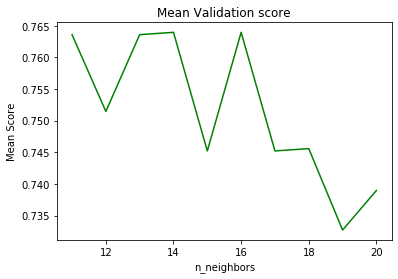

In [39]:
plt.plot(n_neighbors[10:20], mean[10:20], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

Text(0.5, 1.0, 'Standard Deviation of Validation score')

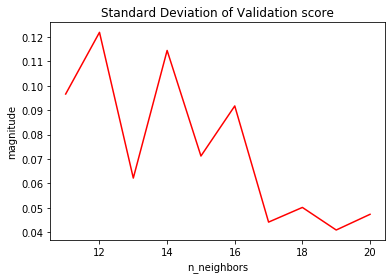

In [40]:
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

In [41]:
clf = KNN(n_neighbors = 13)
clf.fit(train_x, train_y)

score1 = clf.score(train_x, train_y)

score = clf.score(test_x, test_y)
score, score1

(0.7222222222222222, 0.7950310559006211)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
model2 = KNeighborsClassifier(n_neighbors=13)
model2.fit(train_x,train_y)
pred2=model2.predict(test_x)
pred2[:20], model2.score(test_x, test_y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 0.7222222222222222)

In [65]:
model1 = LogisticRegression()
model1.fit(train_x,train_y)
pred1=model1.predict(test_x)
pred1[:20], model1.score(test_x, test_y)
#train_x,test_x,train_y,test_y

C:\Users\Shikhar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]),
 0.8888888888888888)

In [64]:
model3 = DecisionTreeClassifier(max_depth=7)
model3.fit(train_x,train_y)
pred3=model3.predict(test_x)
pred3[:20], model3.score(test_x, test_y)

(array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]),
 0.9814814814814815)

In [56]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [57]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(test_y, final_pred)

0.8888888888888888

In [68]:
accuracy_score(test_y, pred1), accuracy_score(test_y, pred2), accuracy_score(test_y, pred3)

(0.8888888888888888, 0.7222222222222222, 0.9814814814814815)

SyntaxError: invalid syntax (<ipython-input-73-0773feefc16c>, line 1)